In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('Traffic_Accident_2017.csv', encoding = 'cp949')
data

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
3,2017,2017010102,22,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
4,2017,2017010104,37,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2017,2017123118,10,야간,일,1,4,1,0,2,...,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774
4061,2017,2017123118,25,야간,일,1,1,0,0,0,...,단일로,기타단일로,원동기장치자전거,원동기장치자전거,없음,없음,1160683,1704380,129.267745,35.322087
4062,2017,2017123119,55,야간,일,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,없음,없음,1067639,1980346,128.268522,37.820351
4063,2017,2017123120,40,야간,일,1,11,1,9,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,961004,1987481,127.056525,37.886331


In [16]:
temp = data['요일'].value_counts()
y = temp[['월','화','수','목','금','토','일']]
y

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

In [19]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
rc('font',family=font_name)

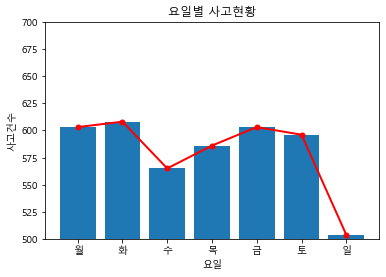

In [50]:
plt.plot(y, c='r', marker = 'o', ls='-', lw = 2, ms = 5, mfc = 'r', mew = 1, mec = 'r')
plt.bar(y.index,y)
plt.ylim(500,700)
plt.title('요일별 사고현황')
plt.xlabel('요일')
plt.ylabel('사고건수').set_rotation(90)
plt.show()

In [61]:
car = data.loc[data.사고유형_대분류 == '차대차']
# car = data[data['사고유형_대분류']=='차대차']
car.head(3)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
8,2017,2017010118,33,야간,일,1,3,1,1,0,...,단일로,기타단일로,승용차,승용차,화물차,화물차,922514,1476665,126.667913,33.278582


In [70]:
# 발생지시도를 기준으로 사상자수 합계 구하기
place = car[['발생지시도','사상자수']].groupby('발생지시도').sum()
place

,사상자수
발생지시도,
강원,214
경기,824
경남,248
경북,287
광주,87
대구,115
대전,61
부산,107
서울,197


<function matplotlib.pyplot.show(close=None, block=None)>

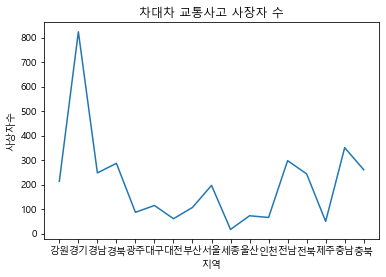

In [94]:
plt.plot(place.index, place.values)
# plt.plot(place.index, place['사상자수'], c = 'b')
# 그래프 그림 크기 조절(비율이 정해져 있어서 마음대로 조정할 수는 없다)
# plt.figure(figsize=(15,5))
plt.xlabel('지역')
plt.ylabel('사상자수').set_rotation(90)
plt.title('차대차 교통사고 사장자 수')
plt.show